In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc,confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from itertools import product
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [11]:
def fit_predict(X_train, X_test, y_train, model, parameters_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=parameters_grid, cv=10, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best = grid_search.best_estimator_
    y_pred = best.predict(X_test)
    return y_pred, grid_search

def get_class_metrics(y_test, y_pred):
  
    acc = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    precision = round(precision_score(y_pred,y_test),3)
    recall = round(recall_score(y_pred,y_test),3)
    
    scores = [acc, f1, precision, recall]
    # Get confusion matrix
    mat = confusion_matrix(y_test, y_pred)
    
      # create confusion matrix
    sns.heatmap(mat, annot=True, fmt='d')
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('True', fontsize=13)
    plt.title('Confusion Matrix', fontsize=14)
    
    return scores, plt, mat
  
def display_df(scores, model):
    df = pd.DataFrame(scores).T
    df = df.rename(index={0: model}, columns={0: 'Accuracy', 1: 'F1 Score',2 :"Precision", 3:"recall"})
    return(df)

def violinplot (x,y,data):
    for i, col in enumerate(y):
      plt.figure(i)
      ax = sns.violinplot(x=x, data=data, y=col)
    
      

In [17]:
df = pd.read_csv("C:/Users/Kashi/Documents/formación/ciencia de datos/proyeectos/trees/breastCancer.csv")

In [4]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [10]:
df.Classification.unique()

array([1, 2], dtype=int64)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,116.0,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.0,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
HOMA,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.0,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.0,10.180874,6.843341,1.656020,5.474283,8.352692,11.815970,38.040000
Resistin,116.0,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
MCP.1,116.0,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
Classification,116.0,1.551724,0.499475,1.000000,1.000000,2.000000,2.000000,2.000000


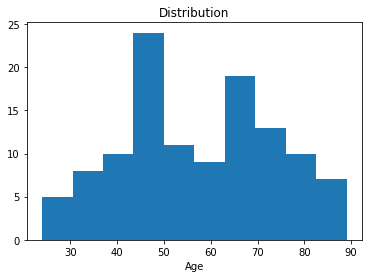

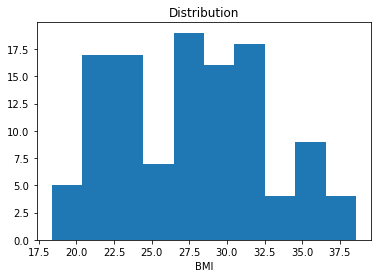

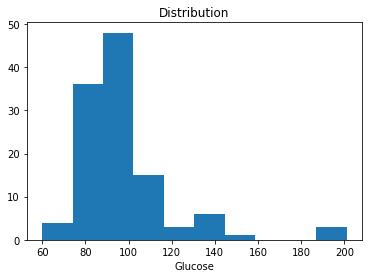

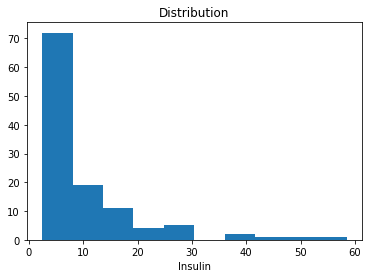

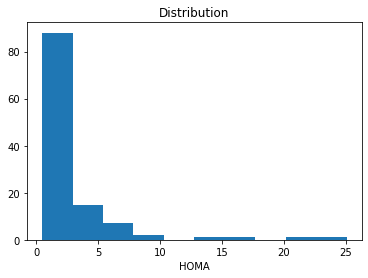

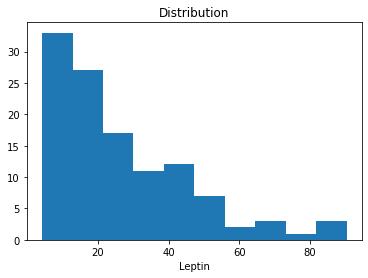

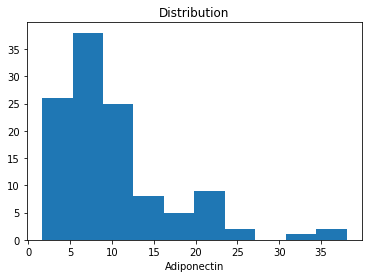

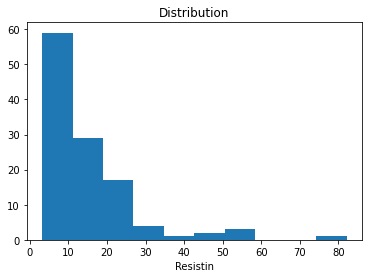

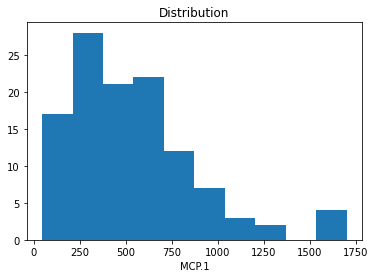

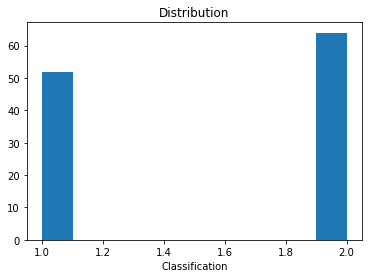

In [8]:
columns = df.columns.values
for i in columns:
    plt.figure(i)
    ax = plt.hist(x=i,data = df)
    plt.xlabel(i)
    plt.title("Distribution")

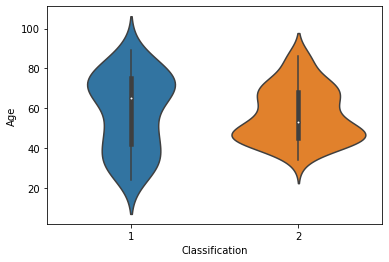

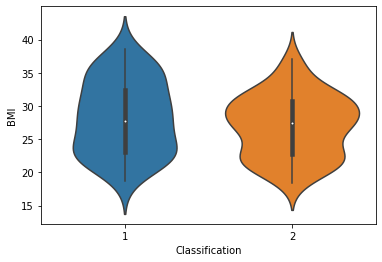

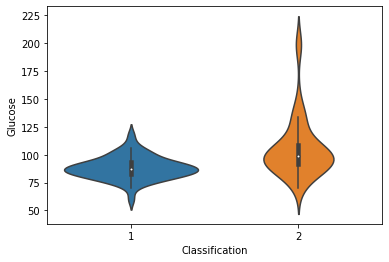

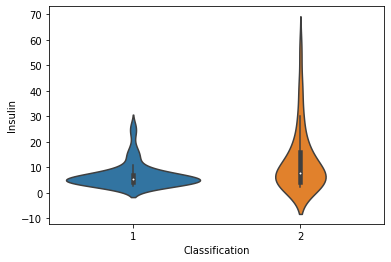

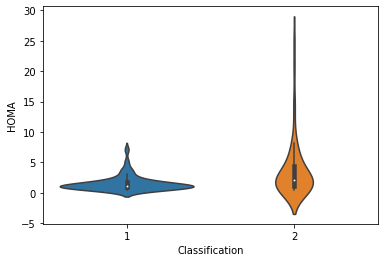

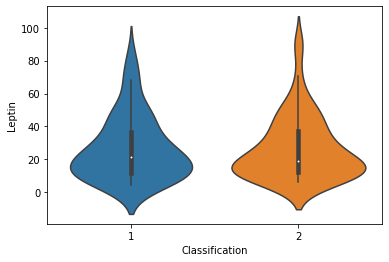

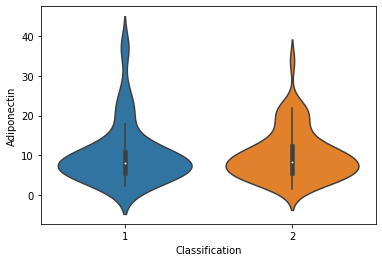

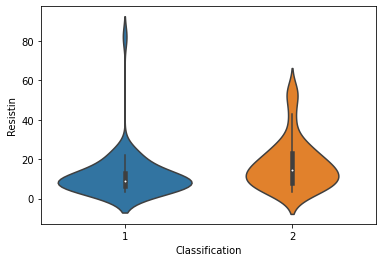

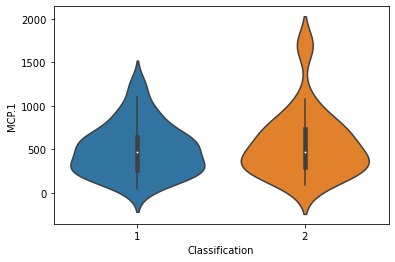

In [12]:
y = df.columns[:-1]
x = df.columns[-1]

violinplot (x,y,df)

In [18]:
#Preprocessing
le = LabelEncoder()

In [20]:
y=df["Classification"]
y = le.fit_transform(y)
x=df.drop(["Classification"],axis=1)

X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.1, random_state = 42)

In [23]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(104, 9)
(12, 9)
(104,)
(12,)


In [24]:
mimax = MinMaxScaler()
x_trainmimax = mimax.fit_transform(X_train) 
x_testmimax= mimax.fit_transform(x_test)


In [28]:
rfclasi = RandomForestClassifier()
parameters_gridrf = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [50, 100],
    'max_features': [5, 10] }


xgbosst = XGBClassifier()
parameters_gridcgboost = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1,1],
     'max_depth': [5, 30]}

In [29]:
y_predrfclasi, grid_searchrf = fit_predict(x_trainmimax,x_testmimax, Y_train, rfclasi, parameters_gridrf)

c:\Users\Kashi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.71545455 0.67545455 0.69454545 0.74181818        nan        nan
        nan        nan 0.72363636 0.72454545 0.71272727 0.71454545
        nan        nan        nan        nan]
  warnings.warn(


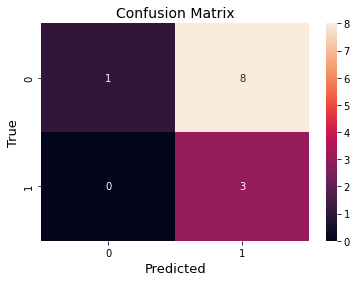

In [30]:
scoresrft, plt, mat = get_class_metrics(y_test, y_predrfclasi)

In [31]:
y_predxgboost, grid_searchxgb = fit_predict(x_trainmimax,x_testmimax, Y_train, xgbosst, parameters_gridcgboost)

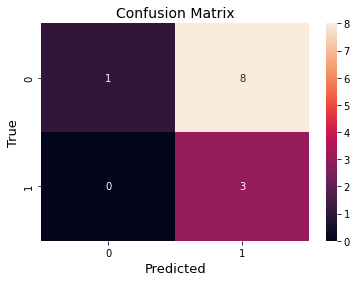

In [32]:
scorescgboost, plt, mat = get_class_metrics(y_test, y_predxgboost)

In [35]:
resrft = display_df(scoresrft,rfclasi)
resxgboost = display_df(scorescgboost,xgbosst)

In [36]:
comparaciontodos = pd.concat([resrft,resxgboost]).sort_values(by=["Accuracy"],ascending=False)
comparaciontodos

,Accuracy,F1 Score,Precision,recall
RandomForestClassifier(),0.333,0.429,1.0,0.273
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, gamma=None,\n gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=None,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, n_estimators=100, n_jobs=None,\n num_parallel_tree=None, predictor=None, random_state=None,\n reg_alpha=None, reg_lambda=None, ...)",0.333,0.429,1.0,0.273
